#1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#2. Dataset Loading & Summary Statistics

In [ ]:
#Read dataset and checking the info and shape
file_path = '/content/drive/MyDrive/0. ML Stats Sem2/vertebral_column_data.txt'

# Read the text file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None)

# Assign the column name as assigned
new_header = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class_label']
df.columns = new_header
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic_incidence            310 non-null    float64
 1   pelvic_tilt                 310 non-null    float64
 2   lumbar_lordosis_angle       310 non-null    float64
 3   sacral_slope                310 non-null    float64
 4   pelvic_radius               310 non-null    float64
 5   grade_of_spondylolisthesis  310 non-null    float64
 6   class_label                 310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


(310, 7)

In [ ]:
#Summary statistics of verterbal dataset
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [ ]:
df.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB


# 3. Exploratory Data Analysis


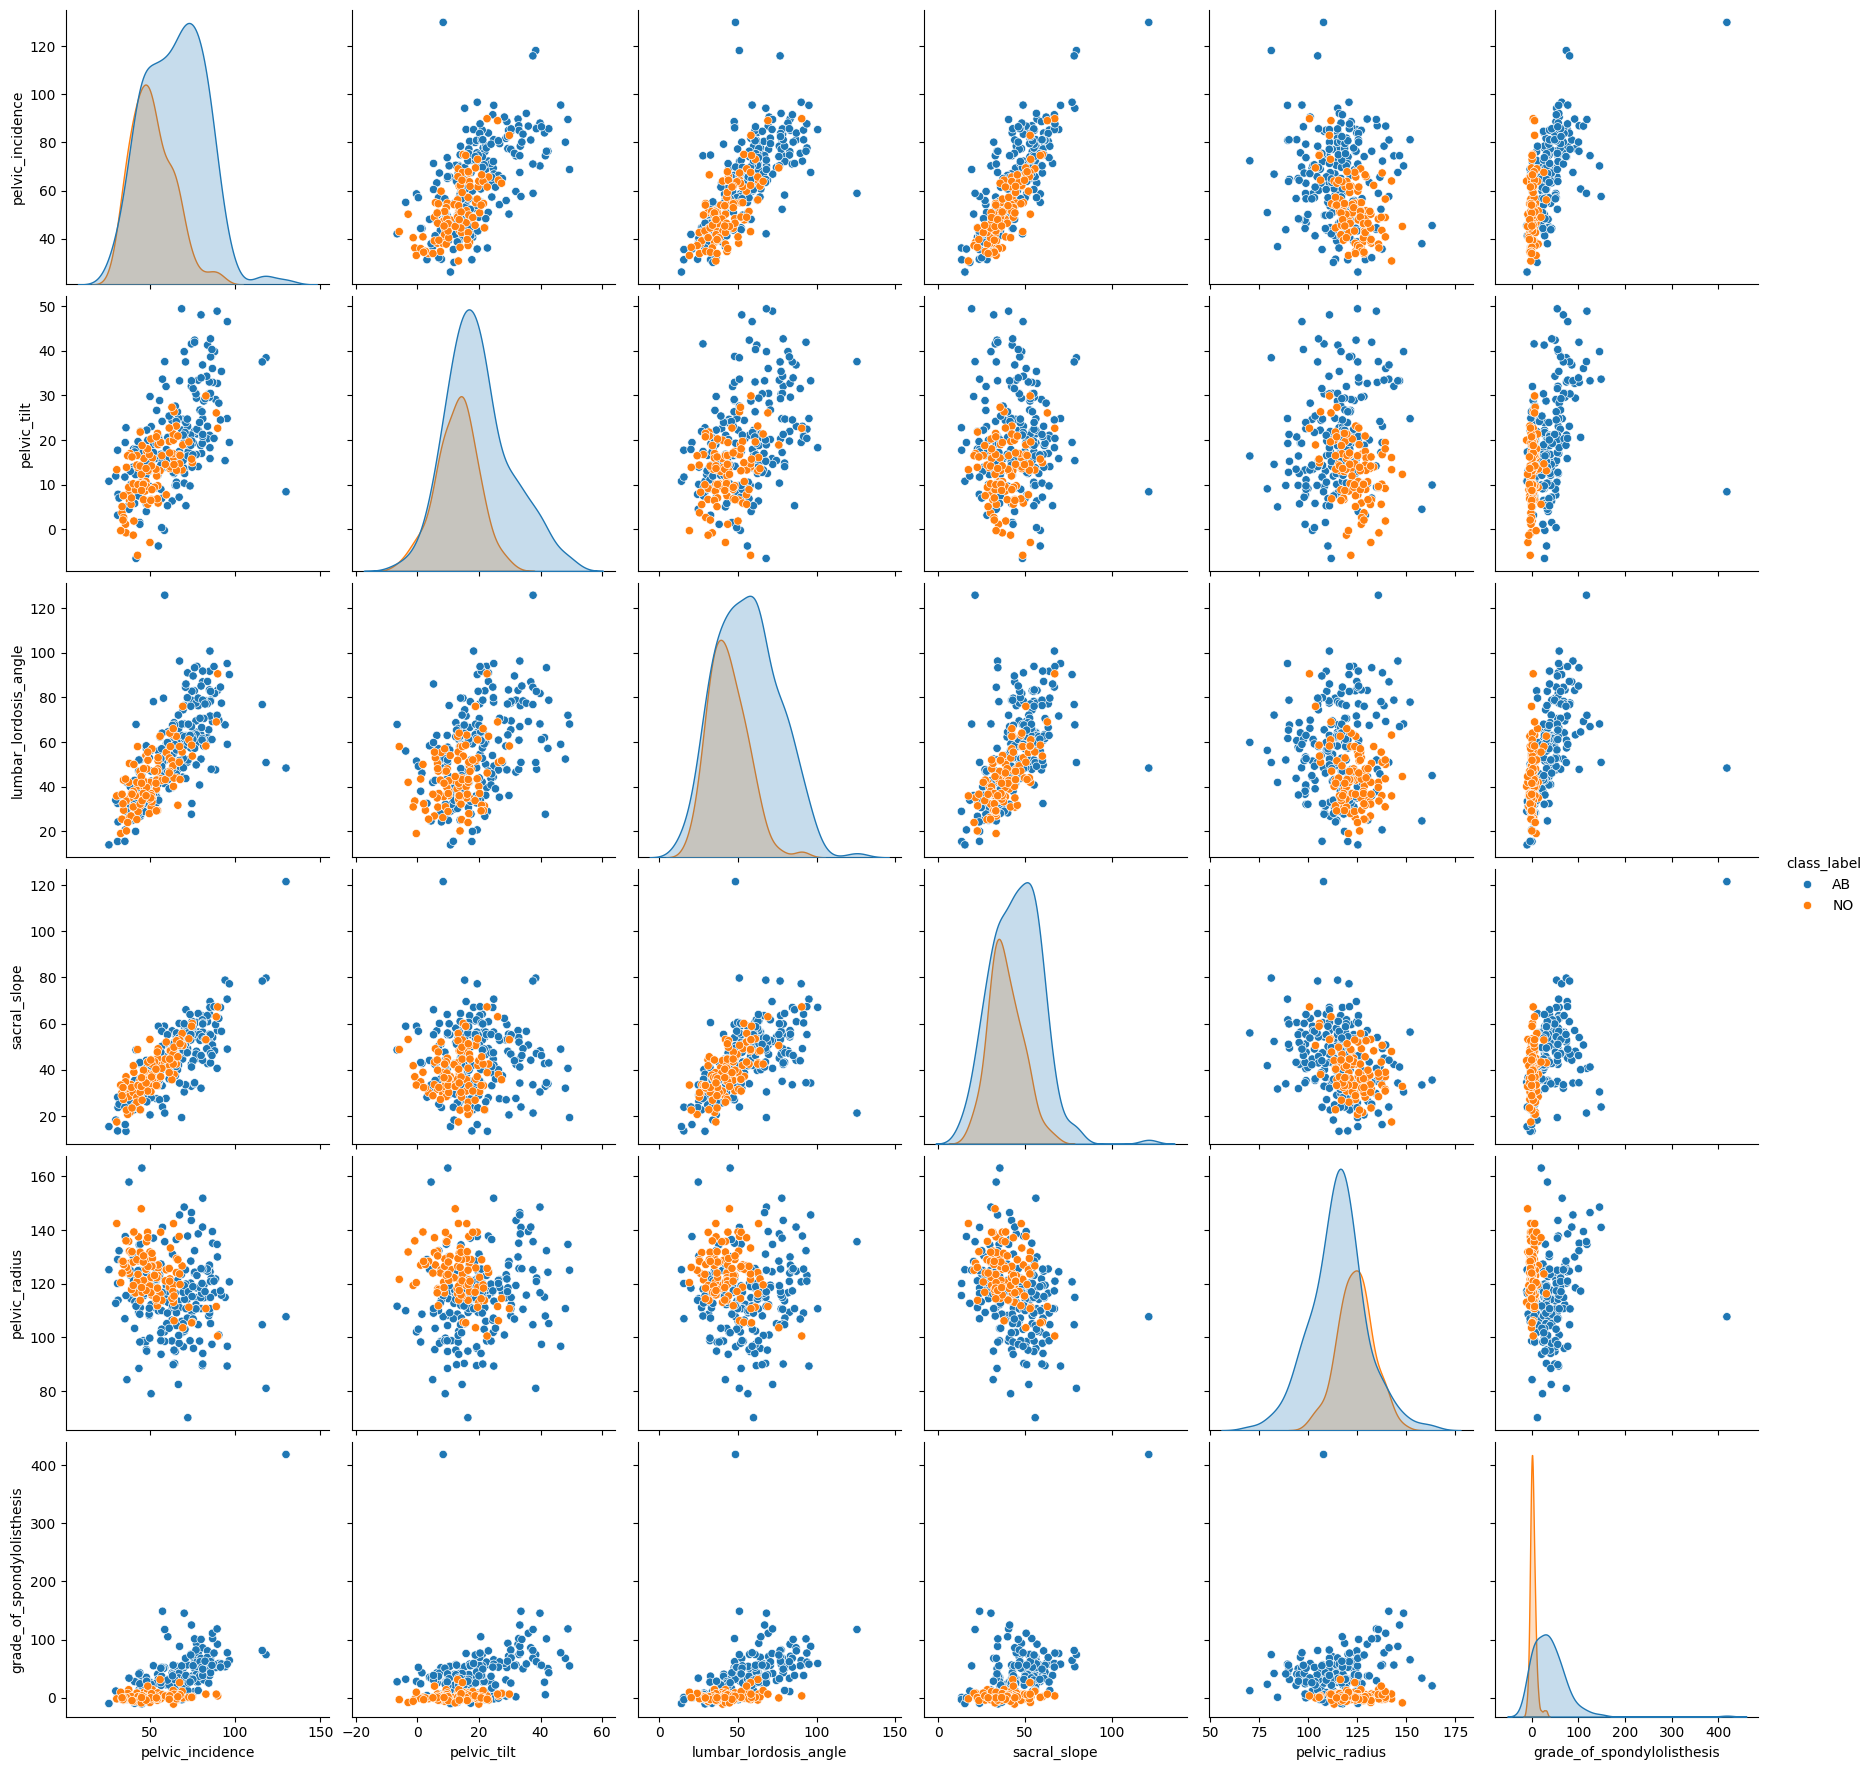

In [ ]:
#Kernel Density Estimation Plot
sns.pairplot(df, hue="class_label", size=3, diag_kind="kde")

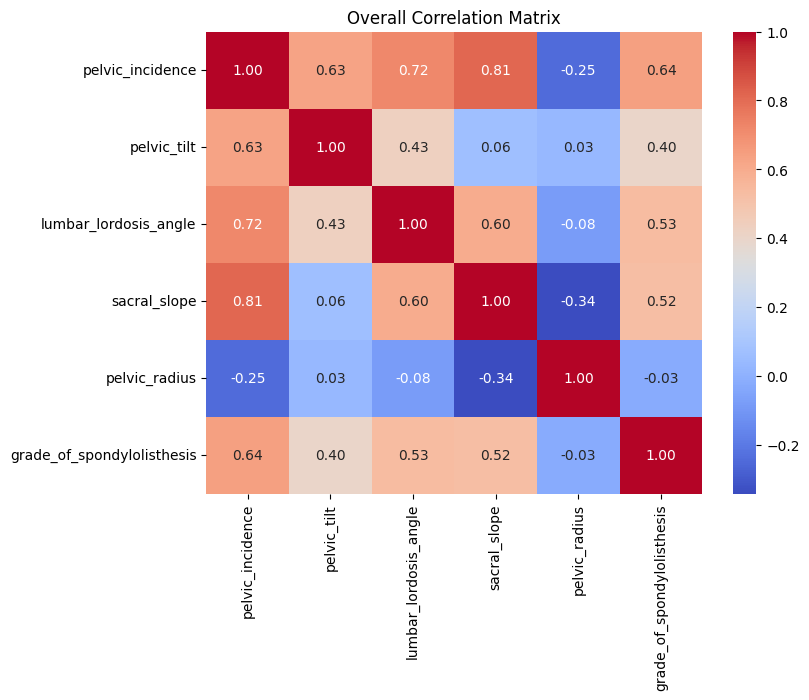

In [ ]:
#Correlation Plot
# Drop 'class_label' column before creating the correlation matrix
df_without_class = df.drop(['class_label'], axis=1)

# Create a correlation matrix
correlation_matrix = df_without_class.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Overall Correlation Matrix')
plt.show()

# 4. Data Preprocessing

## 4.1 Encode

In [ ]:
#Transform the categorical column of class_label into numerical where AB (Abnormal) is coded as 1 and NO (Normal) as 0.
class_label_mapping = {'AB': 1, 'NO': 0}

try:
    df['class_label'] = df['class_label'].map(class_label_mapping)
    print('Encode done without error!')
except Exception as e:
    print(f'Error during encoding: {e}')

Encode done without error!


## Outlier Detection & Removal (Local Outlier Factor LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model and predict the outliers
df['outlier'] = lof.fit_predict(df)

# LOF labels outliers as -1
outliers = df['outlier'] == -1

# Remove outliers
df = df[~outliers]

# Drop the outlier column
df.drop('outlier', axis=1, inplace=True)


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic_incidence            279 non-null    float64
 1   pelvic_tilt                 279 non-null    float64
 2   lumbar_lordosis_angle       279 non-null    float64
 3   sacral_slope                279 non-null    float64
 4   pelvic_radius               279 non-null    float64
 5   grade_of_spondylolisthesis  279 non-null    float64
 6   class_label                 279 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.4 KB


(279, 7)

# 5. Unsupervised Learning - Hierarchical Clustering

## 5.1 Elbow Plot

In [ ]:
# Choose a range of cluster numbers (k)
k_values = range(1, 11)


In [ ]:
# Fit KMeans models for each k and store inertia values
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)


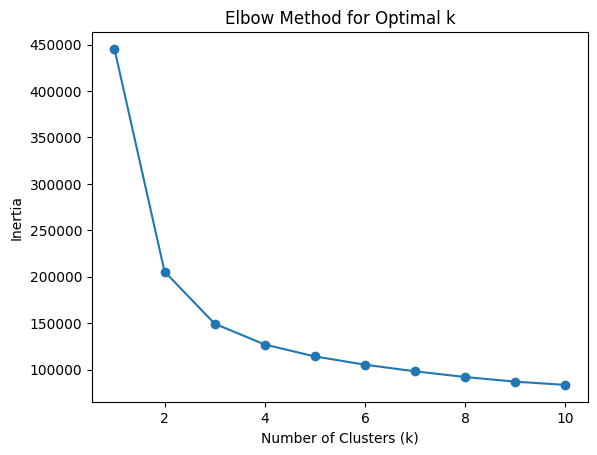

In [ ]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


## 5.2 Modelling - Hierarchical

In [ ]:
from itertools import combinations

all_features = ['pelvic_tilt', 'pelvic_radius', 'grade_of_spondylolisthesis', 'lumbar_lordosis_angle', 'pelvic_incidence','sacral_slope']

# Initialize variables to track the best scores
best_ari = -1
best_nmi = -1
best_silhouette = -1
best_features = None
best_num_clusters = None

# Define the number of splits for K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

# Iterate over different combinations of features
for num_features in range(1, len(all_features) + 1):
    for feature_combination in combinations(all_features, num_features):
        selected_features = list(feature_combination)

        # Standardize the data by mean and variance (True)
        scaler = StandardScaler(with_std=False)
        df_scaled = scaler.fit_transform(df[selected_features])

        # Initialize scores for cross-validation
        ari_scores = []
        nmi_scores = []
        silhouette_scores = []

        # Apply cross-validation
        for train_index, test_index in kf.split(df_scaled):
            # Split the data into train and test sets
            df_scaled_train, df_scaled_test = df_scaled[train_index], df_scaled[test_index]
            df_train, df_test = df.iloc[train_index], df.iloc[test_index]

            # Iterate over different cluster numbers
            for num_clusters in range(2, 4):
                # Apply Hierarchical clustering
                hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
                labels_train = hierarchical.fit_predict(df_scaled_train)
                labels_test = hierarchical.fit_predict(df_scaled_test)

                # Evaluate clustering performance for train set
                ari_score_train = adjusted_rand_score(df_train['class_label'], labels_train)
                nmi_score_train = normalized_mutual_info_score(df_train['class_label'], labels_train)
                silhouette_score_train = silhouette_score(df_scaled_train, labels_train)

                # Evaluate clustering performance for test set
                ari_score_test = adjusted_rand_score(df_test['class_label'], labels_test)
                nmi_score_test = normalized_mutual_info_score(df_test['class_label'], labels_test)
                silhouette_score_test = silhouette_score(df_scaled_test, labels_test)

                # Append scores to lists
                ari_scores.append(ari_score_test)
                nmi_scores.append(nmi_score_test)
                silhouette_scores.append(silhouette_score_test)

        # Calculate average scores
        avg_ari = sum(ari_scores) / n_splits
        avg_nmi = sum(nmi_scores) / n_splits
        avg_silhouette = sum(silhouette_scores) / n_splits

        # Update best scores if the current combination is better
        if avg_ari > best_ari:
            best_ari = avg_ari
            best_nmi = avg_nmi
            best_silhouette = avg_silhouette
            best_features = selected_features
            best_num_clusters = num_clusters

# Print the best results
print("Best Features:", best_features)
print("Best Number of Clusters:", best_num_clusters)
print("Best Average Adjusted Rand Index (ARI):", best_ari)
print("Best Average Normalized Mutual Information (NMI):", best_nmi)
print("Best Average Silhouette Score:", best_silhouette)


Best Features: ['pelvic_radius', 'grade_of_spondylolisthesis', 'lumbar_lordosis_angle']
Best Number of Clusters: 3
Best Average Adjusted Rand Index (ARI): 0.3578143703919993
Best Average Normalized Mutual Information (NMI): 0.32882465612862555
Best Average Silhouette Score: 0.866915203447723


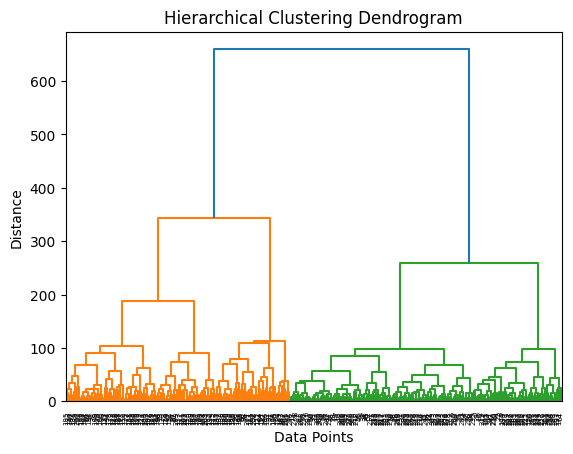

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply Hierarchical clustering with the best number of clusters and features
hierarchical_best = AgglomerativeClustering(n_clusters=best_num_clusters)
labels_best = hierarchical_best.fit_predict(df_scaled)

# Create a linkage matrix
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


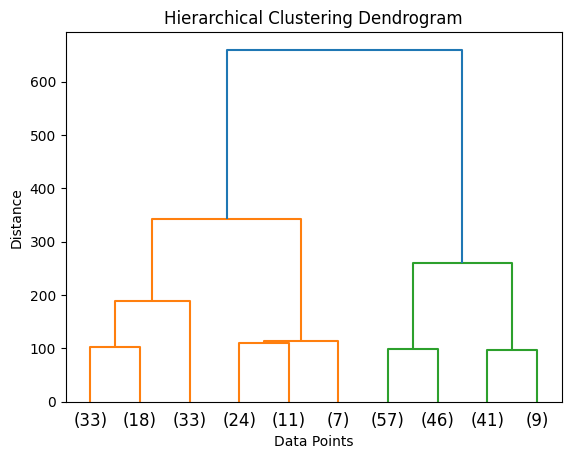

In [ ]:
# Plot the dendrogram with limited x-axis labels
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Assign cluster labels to data points using the best hierarchical clustering model
df['cluster_label'] = hierarchical_best.fit_predict(df_scaled)

# Display a summary table
summary_table = df.groupby('cluster_label').apply(lambda x: ', '.join(map(str, x.index)))
summary_table


cluster_label
0    0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15,...
1    62, 63, 66, 67, 69, 70, 73, 77, 78, 79, 87, 88...
2    60, 61, 72, 74, 80, 81, 82, 83, 84, 92, 96, 98...
dtype: object

## 5.3 Visualize

<Figure size 1000x1000 with 0 Axes>

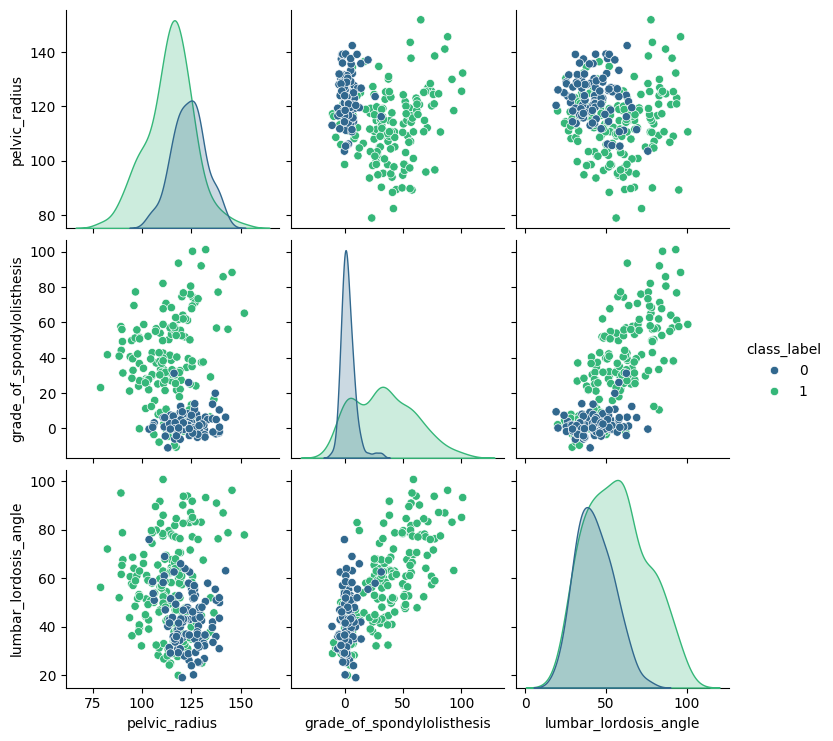

<Figure size 1000x1000 with 0 Axes>

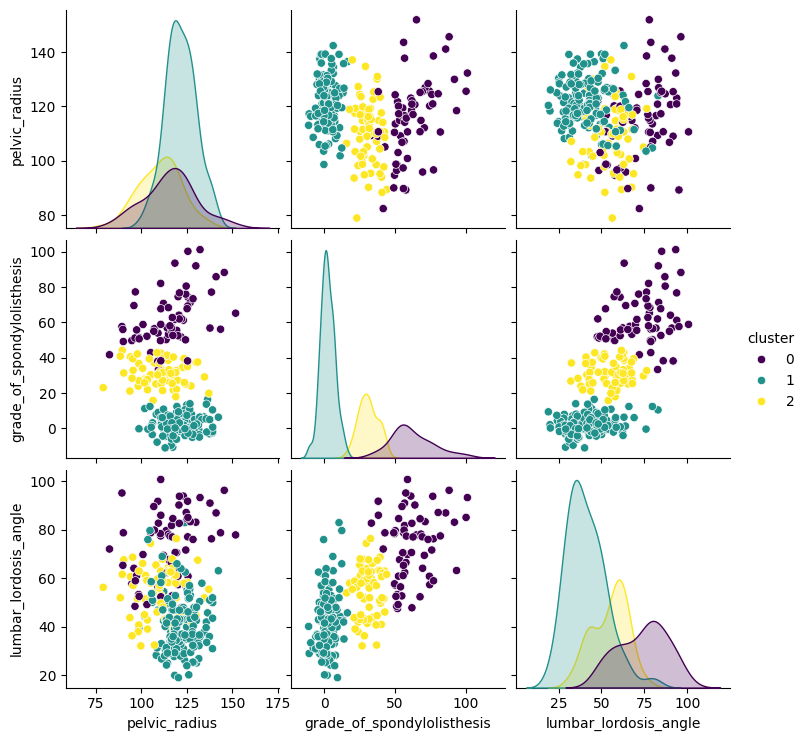

In [ ]:
selected_features = ['pelvic_radius', 'grade_of_spondylolisthesis', 'lumbar_lordosis_angle']

# Standardize the data by mean and variance (True)
scaler = StandardScaler(with_std=False)
df_scaled = scaler.fit_transform(df[selected_features])

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster'] = hierarchical.fit_predict(df_scaled)

# Pair plot for actual labels
plt.figure(figsize=(10,10))
plt.suptitle('Pair Plot for Actual Labels', fontsize=20)
sns.pairplot(df, hue='class_label', palette='viridis', vars=selected_features)
plt.show()

# Pair plot for predicted labels
plt.figure(figsize=(10,10))
plt.suptitle('Pair Plot for Predicted Labels', fontsize=20)
sns.pairplot(df, hue='cluster', palette='viridis', vars=selected_features)
plt.show()

# 6. Supervised Learning - kNN

## 6.1 Bias vs Variance Tradeoff Plot

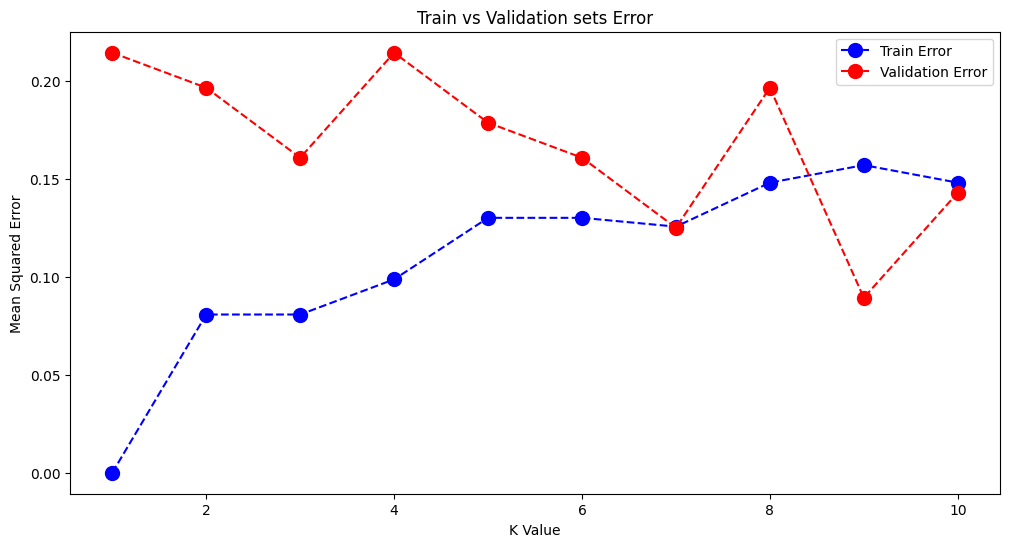

    k  Train Error  Validation Error
0   1     0.000000          0.214286
1   2     0.080717          0.196429
2   3     0.080717          0.160714
3   4     0.098655          0.214286
4   5     0.130045          0.178571
5   6     0.130045          0.160714
6   7     0.125561          0.125000
7   8     0.147982          0.196429
8   9     0.156951          0.089286
9  10     0.147982          0.142857


In [ ]:
from sklearn.metrics import mean_squared_error

k_range = range(1, 11)

# Lists to store errors
train_errors = []
test_errors = []

# Loop over k values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    clf = make_pipeline(preprocessing.StandardScaler(), knn)

    # Fit the model on the training data and predict on both train and test sets
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate the mean squared error for the train and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append to the error lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_errors, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Train Error')
plt.plot(k_range, test_errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='Validation Error')
plt.title('Train vs Validation sets Error')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Create a DataFrame from the errors
error_df = pd.DataFrame({'k': k_range, 'Train Error': train_errors, 'Validation Error': test_errors})

# Print the DataFrame
print(error_df)



## 6.2 Modelling - KNN

In [ ]:
# Assuming that df is your DataFrame and 'class_label' is your target column
X = df.drop('class_label', axis=1)
y = df['class_label']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_k = 1
best_score = 0

for k in range(1, 11):
    # Create a kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = knn.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Update best_k and best_score if the current model is better
    if f1 > best_score:
        best_k = k
        best_score = f1

# Print the best k and best score
print("Best k:", best_k)
print("Best Test F1 Score:", best_score)

# Fit the best model to the training data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Predict the labels of the training set
y_train_pred = knn.predict(X_train)

# Print the accuracy, precision, recall, and F1 score for the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Training Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Training F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

# Print the accuracy, precision, recall, and F1 score for the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Test F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Best k: 9
Best Test F1 Score: 0.8928571428571429
Training Accuracy: 0.8565022421524664
Training Precision: 0.8575291519469654
Training Recall: 0.8565022421524664
Training F1 Score: 0.856942615097293
Test Accuracy: 0.8928571428571429
Test Precision: 0.8928571428571429
Test Recall: 0.8928571428571429
Test F1 Score: 0.8928571428571429


## 6.2 Confusion Matrix and ROC Plot

### Confusion Matrix on Train set

In [ ]:

y_train_pred = knn.predict(X_train)

# Print confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Set):")
print(cm_train)

# Compute ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

# Print ROC curve data for the training set
print("\nROC Curve Data (Train Set):")
print("False Positive Rate:", fpr_train)
print("True Positive Rate:", tpr_train)
print("Thresholds:", thresholds_train)
print("Area Under Curve:", roc_auc_train)


Confusion Matrix (Train Set):
[[ 61  15]
 [ 17 130]]

ROC Curve Data (Train Set):
False Positive Rate: [0.         0.19736842 1.        ]
True Positive Rate: [0.         0.88435374 1.        ]
Thresholds: [2 1 0]
Area Under Curve: 0.8434926602219834


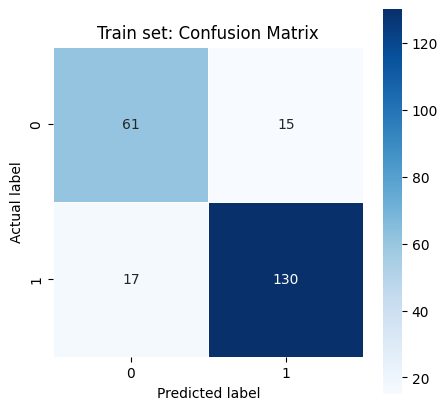

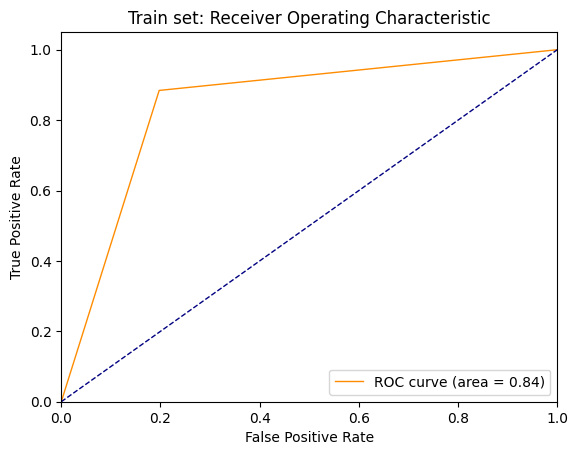

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Train set: Confusion Matrix')  # Added title here

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train set: Receiver Operating Characteristic')  # Added title here
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix on Validation set

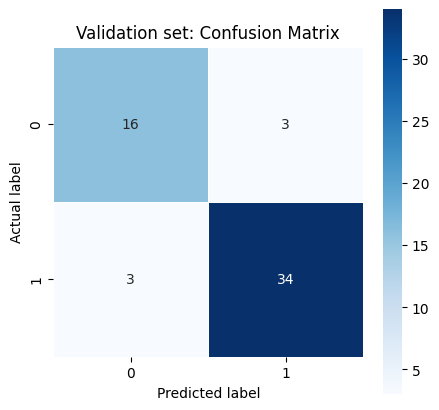

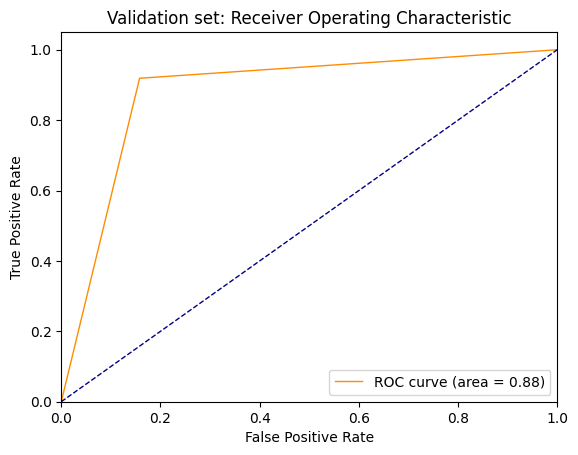

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Validation set: Confusion Matrix')  # Added title here

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation set: Receiver Operating Characteristic')  # Added title here
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print ROC curve data
print("\nROC Curve Data:")
print("False Positive Rate:", fpr)
print("True Positive Rate:", tpr)
print("Thresholds:", thresholds)
print("Area Under Curve:", roc_auc)

Confusion Matrix:
[[16  3]
 [ 3 34]]

ROC Curve Data:
False Positive Rate: [0.         0.15789474 1.        ]
True Positive Rate: [0.         0.91891892 1.        ]
Thresholds: [2 1 0]
Area Under Curve: 0.8805120910384068
